# Logistic Regression

![alt text](https://miro.medium.com/max/1280/1*CYAn9ACXrWX3IneHSoMVOQ.gif)

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

### Algorithm

Given a set of inputs X, we want to assign them to one of two possible categories (0 or 1). Logistic regression models the probability that each input belongs to a particular category.

#### Importing Libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

#### Plotting Data

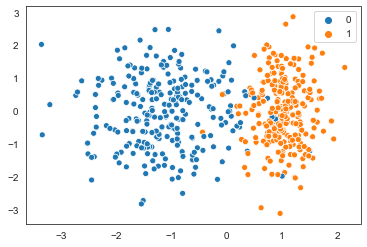

In [25]:
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=14)

y = y[:,np.newaxis]

sns.set_style('white')
sns.scatterplot(X[:,0],X[:,1],hue=y.reshape(-1));

### Sigmoid Function

In [21]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [22]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost

In [23]:
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)

    return (cost_history, params)

In [24]:
def predict(X, params):
    return np.round(sigmoid(X @ params))

### Plotting Model

Initial Cost is: [[0.69312718]] 

Optimal Parameters are: 
 [[-0.45293068]
 [ 3.26552327]
 [ 0.03334871]] 



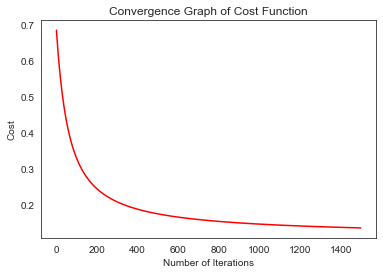

In [26]:
m = len(y)

X = np.hstack((np.ones((m,1)),X))
n = np.size(X,1)
params = np.zeros((n,1))

iterations = 1500
learning_rate = 0.03

initial_cost = compute_cost(X, y, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X, y, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

## Accuracy of the model

In [30]:
y_pred = predict(X, params_optimal)
score = float(sum(y_pred == y))/ float(len(y))

print('Accuracy of the model: ',score*100)

Accuracy of the model:  96.6


## Evaluation

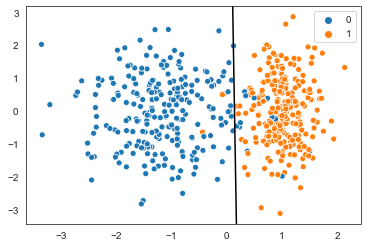

In [28]:
slope = -(params_optimal[1] / params_optimal[2])
intercept = -(params_optimal[0] / params_optimal[2])

sns.set_style('white')
sns.scatterplot(X[:,1],X[:,2],hue=y.reshape(-1));

ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, c="k");